In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create a sample json file
kNumBins = 128
tmp = {str(i*2): 0 for i in range(kNumBins)}

tmp["50"] = 24
tmp["52"] = 36
tmp["54"] = 45
tmp["56"] = 23
tmp["60"] = 5

total_points = 0
for x in tmp.values():
    total_points += x

test_data = [
    {
    "timestamp": 1000.0,
    "id": 254,
    "total_points": total_points,
    "bins": tmp
    }
]

with open("test_data.json", "w") as f:
    json.dump(test_data, f)

In [3]:
# import test_data
with open("test_data.json", "r") as f:
    test_data_read = json.load(f)

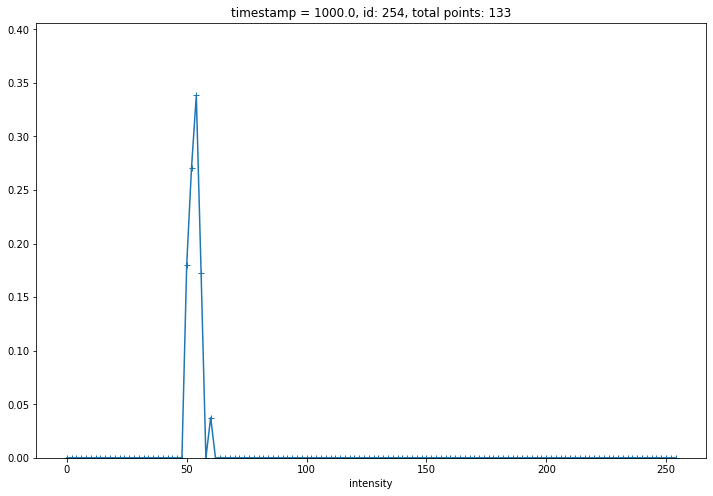

In [40]:
# create data_frame
message = test_data_read[0]
x, y, y_normalized = [], [], []
for bin_i, bin_n in message["bins"].items():
    x.append(int(bin_i))
    y.append(bin_n)
    y_normalized.append(float(bin_n) / message["total_points"])
    
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title(f"timestamp = {message['timestamp']}, id: {message['id']}, total points: {message['total_points']}")
ax.set_xlabel("intensity")
#ax.set_ylim(0,max(y)*1.2)
#ax.plot(x, y, marker="+")
ax.set_ylim(0,max(y_normalized)*1.2)
ax.plot(x, y_normalized, marker="+")
#ax.bar(x, y)
plt.show()    